# 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
pd.set_option('display.max_row',500)
pd.set_option('display.max_columns',500)

In [3]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: DCC8-39CA

 C:\Users\SYU\Documents\SYUai 디렉터리

2022-08-29  오후 01:43    <DIR>          .
2022-08-23  오후 01:20    <DIR>          ..
2022-08-29  오전 09:44    <DIR>          .ipynb_checkpoints
2022-08-29  오전 09:45    <DIR>          dataset
2022-08-24  오후 02:43    <DIR>          input
2022-08-29  오후 01:43           730,219 SYU_DACON.ipynb
2022-08-29  오전 10:03    <DIR>          WorkSpace
               1개 파일             730,219 바이트
               6개 디렉터리  428,967,657,472 바이트 남음


## 데이터 로드

In [4]:
df_train=pd.read_csv('dataset/train.csv')
df_test=pd.read_csv('dataset/test.csv')

In [5]:
df_train.head()

,ID,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Severity
0,A-462285,2021-12-15 18:11:00.000000000,2021-12-15 20:18:24.000000000,36.059036,-95.922034,36.060756,-95.921231,0.127,Slow traffic from E 73rd St to S Braden Ave du...,7181.0,S Yale Ave,L,Tulsa,Tulsa,OK,74136-6326,US,US/Central,KRVS,2021-12-15 17:53:00,76.0,76.0,58.0,29.06,10.0,SSW,23.0,0.0,Mostly Cloudy / Windy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2
1,A-2327376,2020-02-04 17:57:00,2020-02-04 18:28:02,33.913961,-118.107838,33.913961,-118.107838,0.000,At I-605 - Accident.,NaN,Glenn Anderson Fwy W,R,Norwalk,Los Angeles,CA,90650,US,US/Pacific,KFUL,2020-02-04 17:53:00,56.0,56.0,17.0,30.00,10.0,CALM,0.0,0.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,2
2,A-1276216,2021-12-06 18:26:00.000000000,2021-12-06 18:40:30.000000000,46.154347,-107.435978,46.172417,-107.289048,7.141,Slow traffic on I-94 E from Tullock Rd/Exit 53...,NaN,I-94 E,R,Bighorn,Treasure,MT,59010,US,US/Mountain,KM46,2021-12-06 18:26:00,20.0,10.0,85.0,27.12,1.0,NNE,8.0,0.0,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2
3,A-2692390,2018-02-17 17:23:05,2018-02-17 23:23:05,40.647743,-76.419335,40.621655,-76.441113,2.134,At US-209/Exit 107 - Accident. Traffic problem.,NaN,I-81 S,R,Tremont,Schuylkill,PA,17981,US,US/Eastern,KMUI,2018-02-17 17:22:00,30.2,25.4,100.0,30.21,0.5,SE,4.6,NaN,Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,4
4,A-2357636,2020-01-01 20:38:00,2020-01-01 21:32:27,33.935228,-118.092480,33.935228,-118.092480,0.000,At Florence Ave/Exit 123 - Accident.,NaN,I-5 N,R,Downey,Los Angeles,CA,90241,US,US/Pacific,KLGB,2020-01-01 20:53:00,56.0,56.0,84.0,29.87,8.0,CALM,0.0,0.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2


In [6]:
df_test.head()

,ID,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-595845,2021-07-08 23:19:00,2021-07-09 01:42:19,39.033725,-121.043391,39.029257,-121.040812,0.338,Incident on DARKHORSE DR near HOUSE 23744 Driv...,23721.0,Darkhorse Dr,L,Auburn,Nevada,CA,95602-8985,US,US/Pacific,KAUN,2021-07-08 23:15:00,81.0,81.0,23.0,28.27,10.0,E,5.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2379715,2019-12-06 21:37:00,2019-12-06 22:09:29,38.350921,-121.985735,38.350921,-121.985735,0.000,At Davis St - Accident.,NaN,I-80 W,R,Vacaville,Solano,CA,95687,US,US/Pacific,KVCB,2019-12-06 21:53:00,55.0,55.0,93.0,29.85,4.0,SSW,8.0,0.13,Rain,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-1331225,2021-11-23 12:41:30,2021-11-23 13:24:00,38.208634,-78.389402,38.208632,-78.385385,0.218,Stationary traffic on VA-607 - US-29 N from Mi...,1.0,Millwood Dr,R,Ruckersville,Greene,VA,22968-9626,US,US/Eastern,KCHO,2021-11-23 12:53:00,44.0,42.0,27.0,29.44,10.0,VAR,5.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3,A-1130817,2021-06-18 00:16:58,2021-06-18 01:32:37,38.944398,-76.869996,38.944938,-76.863576,0.347,Incident on US-50 EB near EXIT 7A Drive with c...,NaN,John Hanson Hwy E,R,Hyattsville,Prince George's,MD,20785,US,US/Eastern,KCGS,2021-06-18 00:15:00,55.0,55.0,77.0,30.01,10.0,CALM,0.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
4,A-2189003,2020-06-21 02:52:45,2020-06-21 05:21:00,37.347390,-121.920010,37.348260,-121.918800,0.090,At Coleman Ave - Accident. Two lanes blocked.,NaN,I-880 N,R,San Jose,Santa Clara,CA,95110,US,US/Pacific,KSJC,2020-06-21 02:53:00,60.0,60.0,75.0,29.90,10.0,SSE,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138136 entries, 0 to 1138135
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1138136 non-null  object 
 1   Start_Time             1138136 non-null  object 
 2   End_Time               1138136 non-null  object 
 3   Start_Lat              1138136 non-null  float64
 4   Start_Lng              1138136 non-null  float64
 5   End_Lat                1138136 non-null  float64
 6   End_Lng                1138136 non-null  float64
 7   Distance(mi)           1138136 non-null  float64
 8   Description            1138136 non-null  object 
 9   Number                 440253 non-null   float64
 10  Street                 1138135 non-null  object 
 11  Side                   1138136 non-null  object 
 12  City                   1138082 non-null  object 
 13  County                 1138136 non-null  object 
 14  State             

- Civil_Twilight = 시민박명 해는 뜨지 않았지만 모든 사물의 식별이 어느정도 되는 시기-
- Nautical_Twilight= 힝헤박명 주변의 잡스러운 빛이 없고, 대기가 아주 청명한 조건이라 가정했을 때, 수평선은 명확히 구분이 가능하고, 지상의 물체의 윤곽은 구분가능하지만, 군사적으로 아주 섬세한 동작이 요구되는 실외 활동은 불가능한 것으로 정의
- Astronomical_Twilight= 천문박명 즉 천문학에서는 천체[별]을 관착하기 힘든 시간

## bool 데이터 시각화

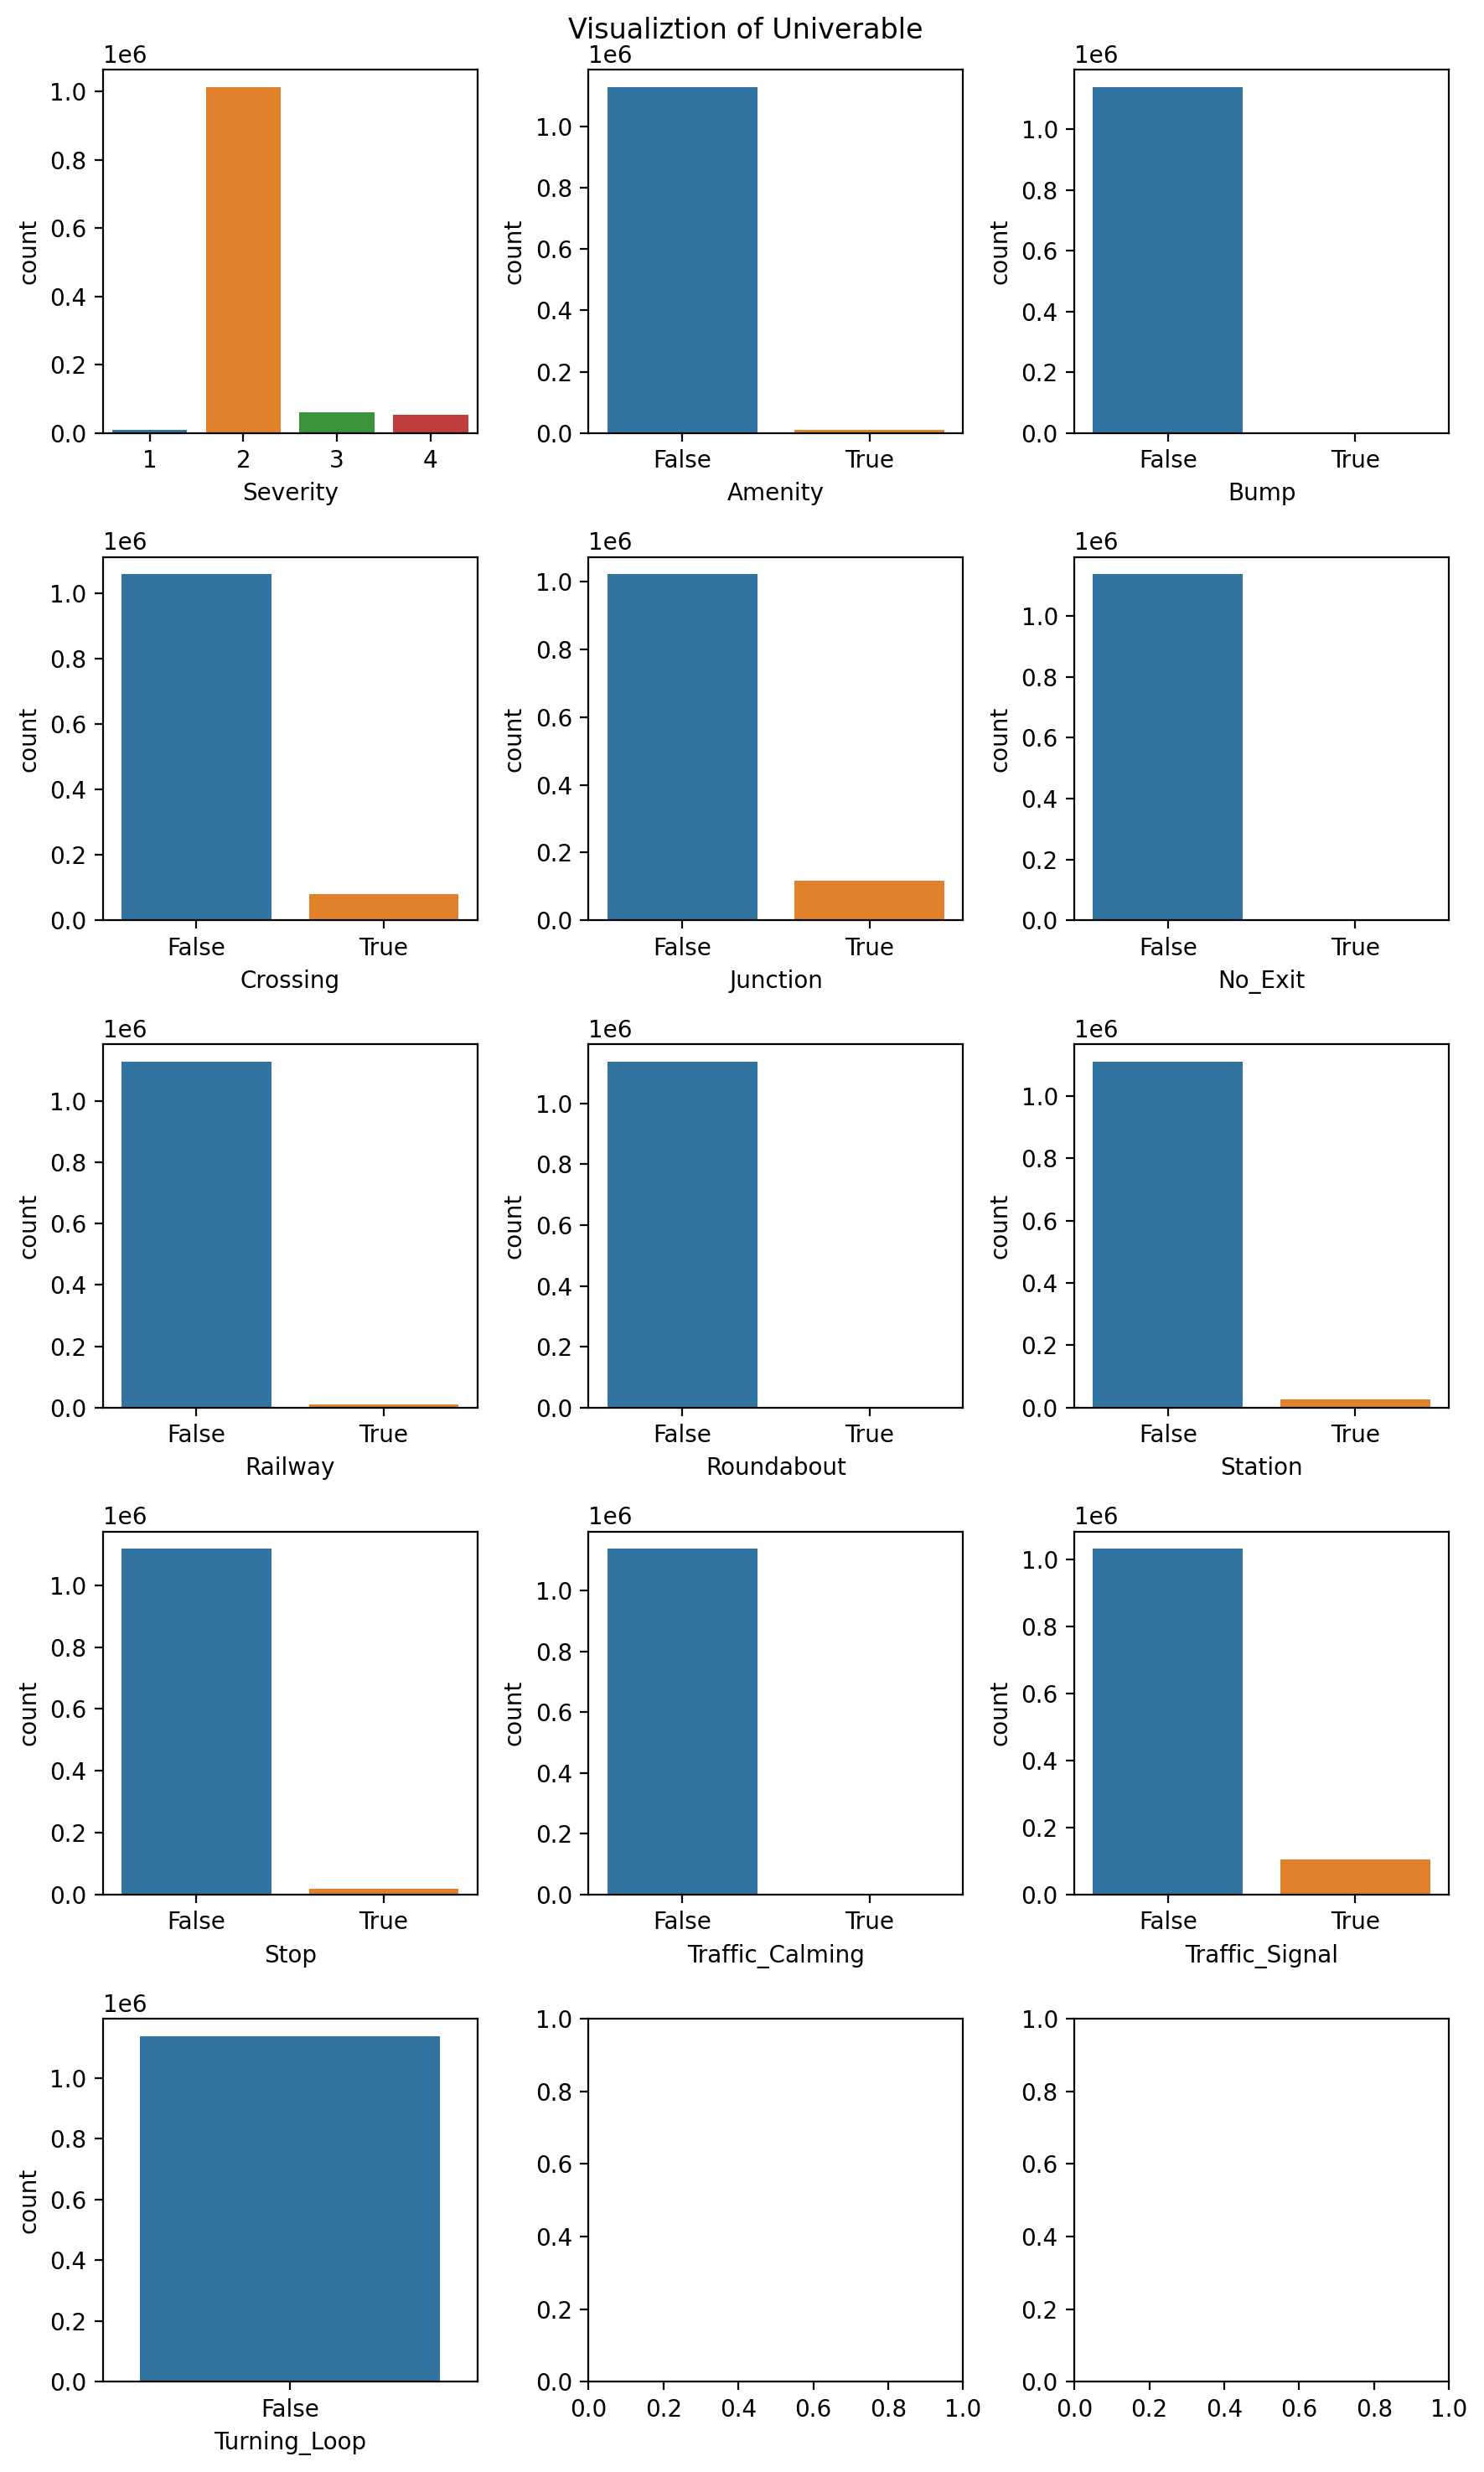

In [7]:
fig, axes=plt.subplots(nrows=5,ncols=3,figsize=(9, 15), dpi=200)
sns.countplot(data=df_train, x='Severity',ax=axes.flat[0])
sns.countplot(data=df_train, x='Amenity',ax=axes[0][1])
sns.countplot(data=df_train, x='Bump',ax=axes[0][2])
sns.countplot(data=df_train, x='Crossing',ax=axes[1][0])
sns.countplot(data=df_train, x='Junction',ax=axes[1][1])
sns.countplot(data=df_train, x='No_Exit',ax=axes[1][2])
sns.countplot(data=df_train, x='Railway',ax=axes[2][0])
sns.countplot(data=df_train, x='Roundabout',ax=axes[2][1])
sns.countplot(data=df_train, x='Station',ax=axes[2][2])
sns.countplot(data=df_train, x='Stop',ax=axes[3][0])
sns.countplot(data=df_train, x='Traffic_Calming',ax=axes[3][1])
sns.countplot(data=df_train, x='Traffic_Signal',ax=axes[3][2])
sns.countplot(data=df_train, x='Turning_Loop',ax=axes[4][0])

plt.suptitle('Visualiztion of Univerable')
fig.tight_layout()
plt.show()

In [26]:
#sns.barplot(data=df_train,y='Amenity',x='Severity')

## 경도 위도 시각화

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

C:\Users\SYU\miniconda3\envs\dacon\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


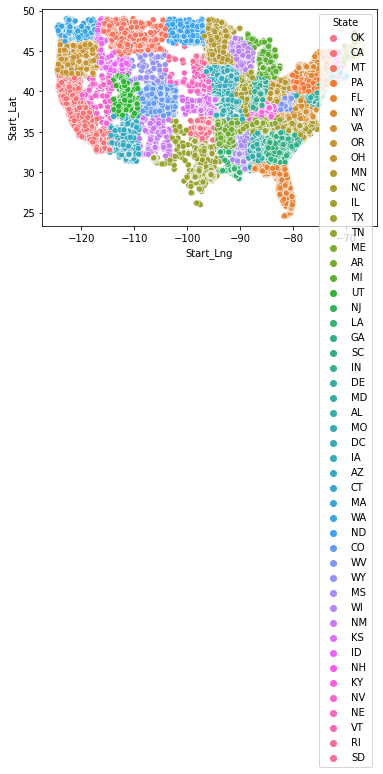

In [8]:
sns.scatterplot(data=df_train,x="Start_Lng", y="Start_Lat", hue='State')

In [ ]:
sns.countplot(color)

<AxesSubplot:xlabel='Amenity', ylabel='count'>

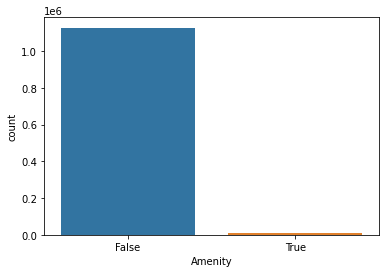

In [9]:
sns.countplot(data=df_train, x='Amenity')

## twilight 시각화

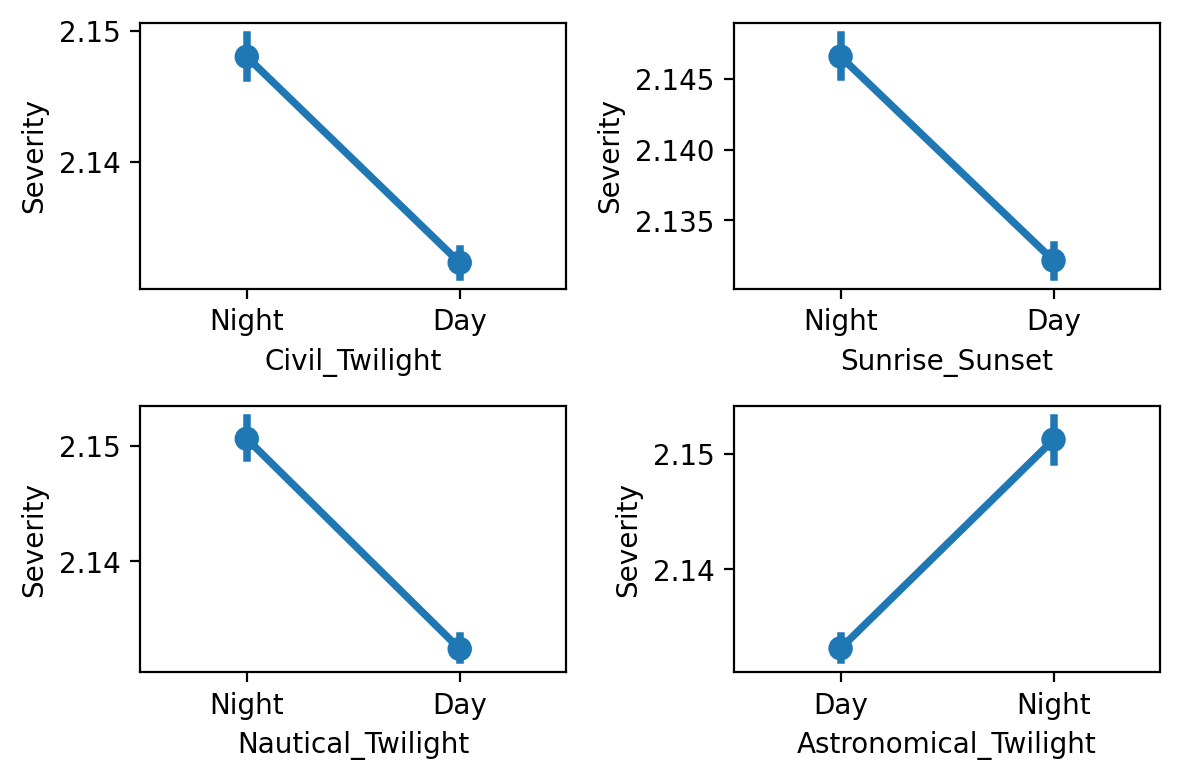

In [12]:
fig, axes=plt.subplots(nrows=2,ncols=2, dpi=200)
sns.pointplot(data=df_train,x='Civil_Twilight',y='Severity',ax=axes[0][0])
sns.pointplot(data=df_train,x='Sunrise_Sunset',y='Severity',ax=axes[0][1])
sns.pointplot(data=df_train,x='Nautical_Twilight',y='Severity',ax=axes[1][0])
sns.pointplot(data=df_train,x='Astronomical_Twilight',y='Severity',ax=axes[1][1])
fig.tight_layout()
plt.show()

#night일때 심각도 더 높음

In [ ]:
#sns.kdeplot(data=df_train,x='Distance(mi)',y='Severity')

## 결측치 확인

<AxesSubplot:>

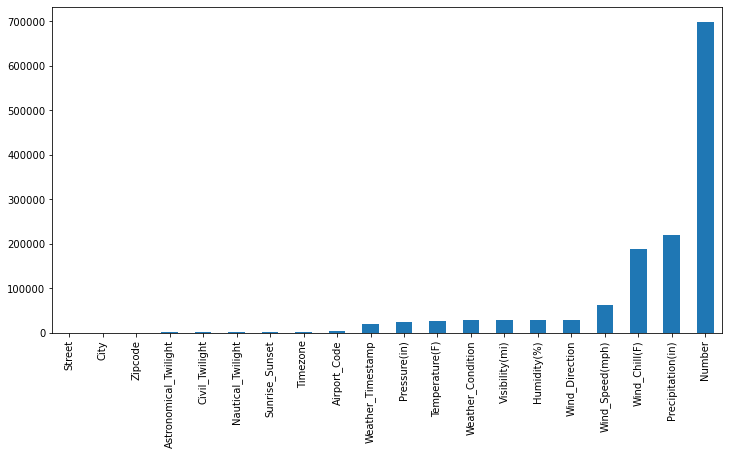

In [28]:
Nulldata=df_train.isnull().sum()
Nulldata=Nulldata[Nulldata>0]
Nulldata.sort_values(inplace=True)
Nulldata.plot.bar(figsize=(12,6))

## 수치,범주 데이터 나누기

In [5]:
n=['int64','float64']
df_train_num=df_train.select_dtypes(include=n)
df_train_cat=df_train.drop(df_train.select_dtypes(include=n),axis=1)


In [6]:
df_train_cat

,ID,Start_Time,End_Time,Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-462285,2021-12-15 18:11:00.000000000,2021-12-15 20:18:24.000000000,Slow traffic from E 73rd St to S Braden Ave du...,S Yale Ave,L,Tulsa,Tulsa,OK,74136-6326,US,US/Central,KRVS,2021-12-15 17:53:00,SSW,Mostly Cloudy / Windy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
1,A-2327376,2020-02-04 17:57:00,2020-02-04 18:28:02,At I-605 - Accident.,Glenn Anderson Fwy W,R,Norwalk,Los Angeles,CA,90650,US,US/Pacific,KFUL,2020-02-04 17:53:00,CALM,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
2,A-1276216,2021-12-06 18:26:00.000000000,2021-12-06 18:40:30.000000000,Slow traffic on I-94 E from Tullock Rd/Exit 53...,I-94 E,R,Bighorn,Treasure,MT,59010,US,US/Mountain,KM46,2021-12-06 18:26:00,NNE,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-2692390,2018-02-17 17:23:05,2018-02-17 23:23:05,At US-209/Exit 107 - Accident. Traffic problem.,I-81 S,R,Tremont,Schuylkill,PA,17981,US,US/Eastern,KMUI,2018-02-17 17:22:00,SE,Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4,A-2357636,2020-01-01 20:38:00,2020-01-01 21:32:27,At Florence Ave/Exit 123 - Accident.,I-5 N,R,Downey,Los Angeles,CA,90241,US,US/Pacific,KLGB,2020-01-01 20:53:00,CALM,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138131,A-1649567,2021-02-19 20:24:00,2021-02-19 23:29:47,Accident on Macalla Rd/Hillcrest Rd (I-80) fro...,I-80 E,R,Oakland,Alameda,CA,94607,US,US/Pacific,KOAK,2021-02-19 20:53:00,W,Mostly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1138132,A-1963274,2020-09-30 15:42:30,2020-09-30 16:57:30,Incident on I-95 SB near EXIT 19 Drive with ca...,I-95 S,R,Hallandale,Broward,FL,33009,US,US/Eastern,KFLL,2020-09-30 15:53:00,NNE,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
1138133,A-839074,2021-09-25 04:22:00,2021-09-25 05:34:30,Stationary traffic on I-95 S from I-695/Exit 4...,I-95 S,R,Halethorpe,Baltimore County,MD,21227,US,US/Eastern,KBWI,2021-09-25 03:54:00,CALM,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1138134,A-620379,2021-11-23 15:23:00,2021-11-23 17:35:45,Slow traffic from US-131 (Burton St) to Easter...,Burton St SW,R,Grand Rapids,Kent,MI,49507-2918,US,US/Eastern,KGRR,2021-11-23 15:53:00,SW,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


array(['Mostly Cloudy / Windy', 'Mostly Cloudy', 'Light Snow', 'Snow',
       'Fair', 'Cloudy', 'Light Rain', 'Partly Cloudy', 'Overcast', 'Fog',
       'Clear', 'Scattered Clouds', 'Rain', 'Smoke', nan, 'Haze',
       'Heavy T-Storm', 'Heavy Rain', 'Light Rain with Thunder',
       'Light Snow / Windy', 'Patches of Fog', 'Light Freezing Fog',
       'Light Drizzle', 'Light Rain / Windy', 'T-Storm',
       'Light Rain Shower', 'Haze / Windy', 'Thunder / Windy',
       'Thunder in the Vicinity', 'Fair / Windy', 'Partly Cloudy / Windy',
       'Thunder', 'Heavy Snow / Windy', 'Thunderstorm',
       'Showers in the Vicinity', 'Heavy T-Storm / Windy',
       'Heavy Thunderstorms and Rain', 'Cloudy / Windy', 'Mist',
       'Wintry Mix', 'Light Freezing Rain', 'Heavy Rain / Windy',
       'Thunderstorms and Rain', 'Snow Grains', 'Heavy Snow',
       'Light Thunderstorms and Rain', 'Rain / Windy', 'Snow / Windy',
       'Drizzle', 'Blowing Snow / Windy', 'Partial Fog', 'Shallow Fog',
       '

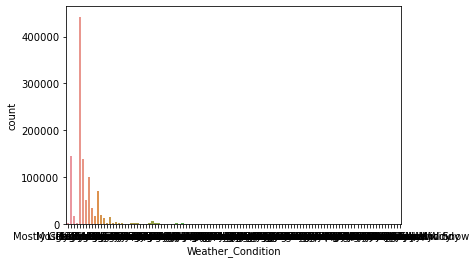

In [7]:
sns.countplot(data=df_train_cat,x='Weather_Condition')
weather=df_train_cat['Weather_Condition'].unique()
weather

### 년월일 시간 나누기

In [8]:
df_train_cat['Start_Time']=pd.to_datetime(df_train_cat['Start_Time'])
df_train_cat['End_Time']=pd.to_datetime(df_train_cat['End_Time'])

#df_train_cat.dtypes
df_train['stYear']=df_train_cat['Start_Time'].dt.year
df_train['stMonth']=df_train_cat['Start_Time'].dt.month
df_train['stMonthName']=df_train_cat['Start_Time'].dt.month_name()
df_train['stday']=df_train_cat['Start_Time'].dt.day
df_train['sttime']=df_train_cat['Start_Time'].dt.time
df_train['stweekday']=df_train_cat['Start_Time'].dt.day_name()
df_train['sthour']=df_train_cat['Start_Time'].dt.hour

df_train['endYear']=df_train_cat['End_Time'].dt.year
df_train['endMonth']=df_train_cat['End_Time'].dt.month
df_train['stMonthName']=df_train_cat['End_Time'].dt.month_name()
df_train['endday']=df_train_cat['End_Time'].dt.day
df_train['endtime']=df_train_cat['End_Time'].dt.time
df_train['endweekday']=df_train_cat['End_Time'].dt.day_name()
df_train


,ID,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Severity,stYear,stMonth,stMonthName,stday,sttime,stweekday,sthour,endYear,endMonth,endday,endtime
0,A-462285,2021-12-15 18:11:00.000000000,2021-12-15 20:18:24.000000000,36.059036,-95.922034,36.060756,-95.921231,0.127,Slow traffic from E 73rd St to S Braden Ave du...,7181.0,S Yale Ave,L,Tulsa,Tulsa,OK,74136-6326,US,US/Central,KRVS,2021-12-15 17:53:00,76.0,76.0,58.0,29.06,10.00,SSW,23.0,0.00,Mostly Cloudy / Windy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2,2021,12,December,15,18:11:00,Wednesday,18,2021,12,15,20:18:24
1,A-2327376,2020-02-04 17:57:00,2020-02-04 18:28:02,33.913961,-118.107838,33.913961,-118.107838,0.000,At I-605 - Accident.,NaN,Glenn Anderson Fwy W,R,Norwalk,Los Angeles,CA,90650,US,US/Pacific,KFUL,2020-02-04 17:53:00,56.0,56.0,17.0,30.00,10.00,CALM,0.0,0.00,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,2,2020,2,February,4,17:57:00,Tuesday,17,2020,2,4,18:28:02
2,A-1276216,2021-12-06 18:26:00.000000000,2021-12-06 18:40:30.000000000,46.154347,-107.435978,46.172417,-107.289048,7.141,Slow traffic on I-94 E from Tullock Rd/Exit 53...,NaN,I-94 E,R,Bighorn,Treasure,MT,59010,US,US/Mountain,KM46,2021-12-06 18:26:00,20.0,10.0,85.0,27.12,1.00,NNE,8.0,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2,2021,12,December,6,18:26:00,Monday,18,2021,12,6,18:40:30
3,A-2692390,2018-02-17 17:23:05,2018-02-17 23:23:05,40.647743,-76.419335,40.621655,-76.441113,2.134,At US-209/Exit 107 - Accident. Traffic problem.,NaN,I-81 S,R,Tremont,Schuylkill,PA,17981,US,US/Eastern,KMUI,2018-02-17 17:22:00,30.2,25.4,100.0,30.21,0.50,SE,4.6,NaN,Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,4,2018,2,February,17,17:23:05,Saturday,17,2018,2,17,23:23:05
4,A-2357636,2020-01-01 20:38:00,2020-01-01 21:32:27,33.935228,-118.092480,33.935228,-118.092480,0.000,At Florence Ave/Exit 123 - Accident.,NaN,I-5 N,R,Downey,Los Angeles,CA,90241,US,US/Pacific,KLGB,2020-01-01 20:53:00,56.0,56.0,84.0,29.87,8.00,CALM,0.0,0.00,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2,2020,1,January,1,20:38:00,Wednesday,20,2020,1,1,21:32:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138131,A-1649567,2021-02-19 20:24:00,2021-02-19 23:29:47,37.822487,-122.321393,37.822696,-122.320113,0.071,Accident on Macalla Rd/Hillcrest Rd (I-80) fro...,NaN,I-80 E,R,Oakland,Alameda,CA,94607,US,US/Pacific,KOAK,2021-02-19 20:53:00,55.0,55.0,72.0,30.30,10.00,W,16.0,0.00,Mostly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2,2021,2,February,19,20:24:00,Friday,20,2021,2,19,23:29:47
1138132,A-1963274,2020-09-30 15:42:30,2020-09-30 16:57:30,25.996004,-80.166227,25.992919,-80.166112,0.213,Incident on I-95 SB near EXIT 19 Drive with ca...,NaN,I-95 S,R,Hallandale,Broward,FL,33009,US,US/Eastern,KFLL,2020-09-30 15:53:00,80.0,80.0,96.0,29.90,10.00,NNE,5.0,0.41,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,2,2020,9,September,30,15:42:30,Wednesday,15,2020,9,30,16:57:30
1138133,A-839074,2021-09-25 04:22

In [ ]:
df_train_num.drop(['Year','Month'],axis=1)


## 연도별 시각화

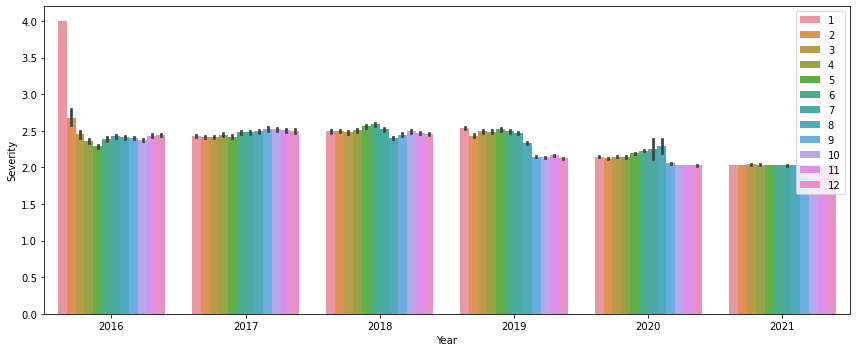

In [39]:
fig=plt.figure(figsize=(12,5))
sns.barplot(data=df_train,x='Year',y='Severity',hue='Month')
plt.tight_layout()
plt.legend(loc='upper right')

<AxesSubplot:xlabel='sthour', ylabel='Severity'>

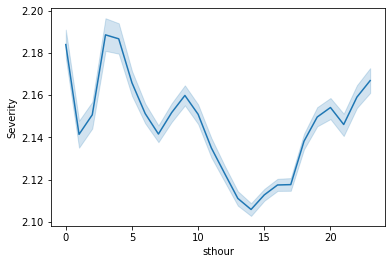

In [26]:
sns.lineplot(data=df_train,x='sthour',y='Severity')

In [35]:
df_train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138136 entries, 0 to 1138135
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Start_Lat          1138136 non-null  float64
 1   Start_Lng          1138136 non-null  float64
 2   End_Lat            1138136 non-null  float64
 3   End_Lng            1138136 non-null  float64
 4   Distance(mi)       1138136 non-null  float64
 5   Number             440253 non-null   float64
 6   Temperature(F)     1110598 non-null  float64
 7   Wind_Chill(F)      950685 non-null   float64
 8   Humidity(%)        1109076 non-null  float64
 9   Pressure(in)       1114521 non-null  float64
 10  Visibility(mi)     1109965 non-null  float64
 11  Wind_Speed(mph)    1075066 non-null  float64
 12  Precipitation(in)  918622 non-null   float64
 13  Severity           1138136 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 121.6 MB


In [ ]:
df_train[df_train['Wind_Speed(mph)']<20]

## 기상 시각화

<AxesSubplot:xlabel='Severity', ylabel='Wind_Speed(mph)'>

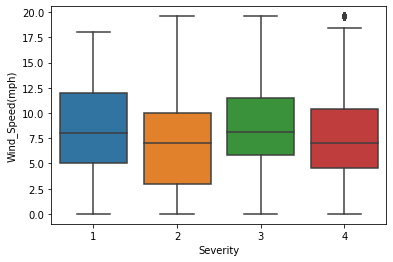

In [10]:
df_train = df_train[df_train['Wind_Speed(mph)']<20]

sns.boxplot(data=df_train,y='Wind_Speed(mph)',x='Severity')
# 20이하

In [17]:
df_train['Precipitation(in)'].value_counts()

0.00    811614
0.01     20112
0.02      9787
0.03      6659
0.04      5083
0.05      3900
0.06      3229
0.07      2548
0.08      2217
0.09      2018
Name: Precipitation(in), dtype: int64

<AxesSubplot:xlabel='Severity', ylabel='Precipitation(in)'>

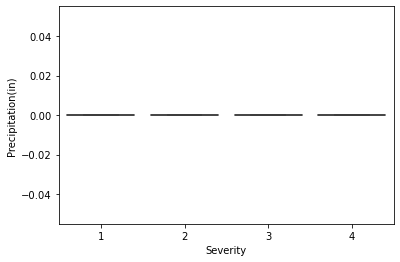

In [22]:
df_train = df_train[df_train['Precipitation(in)']<0.1]

sns.boxplot(data=df_train,y='Precipitation(in)',x='Severity')


<AxesSubplot:xlabel='Severity', ylabel='Wind_Chill(F)'>

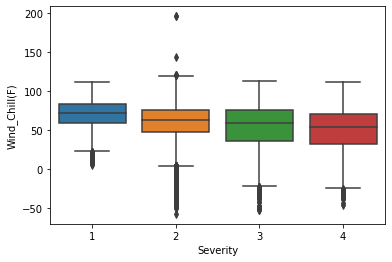

In [37]:
sns.boxplot(data=df_train,y='Wind_Chill(F)',x='Severity') 

In [ ]:
corrMat=df_train[['Temperature(F)','Wind_Chill(F)','Humidity(%)',        
 'Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Severity']]
                 
sns.heatmap(corrMat,annot=True)